In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
dataFeatures = []
for i in data.columns:
    dataFeatures.append([i, data[i].nunique(), data[i].drop_duplicates().values])
pd.DataFrame(dataFeatures, columns = ['Features', 'Unique Number', 'Values'])

Features  Unique Number  \
0                        Age             43   
1                  Attrition              2   
2             BusinessTravel              3   
3                  DailyRate            886   
4                 Department              3   
5           DistanceFromHome             29   
6                  Education              5   
7             EducationField              6   
8              EmployeeCount              1   
9             EmployeeNumber           1470   
10   EnvironmentSatisfaction              4   
11                    Gender              2   
12                HourlyRate             71   
13            JobInvolvement              4   
14                  JobLevel              5   
15                   JobRole              9   
16           JobSatisfaction              4   
17             MaritalStatus              3   
18             MonthlyIncome           1349   
19               MonthlyRate           1427   
20        NumCompaniesWorked             10   
21                    Over18              1   
22                  OverTime              2   
23         PercentSalaryHike             15   
24         PerformanceRating              2   
25  RelationshipSatisfaction              4   
26             StandardHours              1   
27          StockOptionLevel              4   
28         TotalWorkingYears             40   
29     TrainingTimesLastYear              7   
30           WorkLifeBalance              4   
31            YearsAtCompany             37   
32        YearsInCurrentRole             19   
33   YearsSinceLastPromotion             16   
34      YearsWithCurrManager             18   

                                               Values  
0   [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...  
1                                           [Yes, No]  
2      [Travel_Rarely, Travel_Frequently, Non-Travel]  
3   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...  
4    [Sales, Research & Development, Human Resources]  
5   [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...  
6                                     [2, 1, 4, 3, 5]  
7   [Life Sciences, Other, Medical, Marketing, Tec...  
8                                                 [1]  
9   [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...  
10                                       [2, 3, 4, 1]  
11                                     [Female, Male]  
12  [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...  
13                                       [3, 2, 4, 1]  
14                                    [2, 1, 3, 4, 5]  
15  [Sales Executive, Research Scientist, Laborato...  
16                                       [4, 2, 3, 1]  
17                        [Single, Married, Divorced]  
18  [5993, 5130, 2090, 2909, 3468, 3068, 2670, 269...  
19  [19479, 24907, 2396, 23159, 16632, 11864, 9964...  
20                     [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]  
21                                                [Y]  
22                                          [Yes, No]  
23  [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 1...  
24                                             [3, 4]  
25                                       [1, 4, 2, 3]  
26                                               [80]  
27                                       [0, 1, 3, 2]  
28  [8, 10, 7, 6, 12, 1, 17, 5, 3, 31, 13, 0, 26, ...  
29                              [0, 3, 2, 5, 1, 4, 6]  
30                                       [1, 3, 2, 4]  
31  [6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14,...  
32  [4, 7, 0, 2, 5, 9, 8, 3, 6, 13, 1, 15, 14, 16,...  
33  [0, 1, 3, 2, 7, 4, 8, 6, 5, 15, 9, 13, 12, 10,...  
34  [5, 7, 0, 2, 6, 8, 3, 11, 17, 1, 4, 12, 9, 10,...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


In [7]:
have_duplicate_rows = data.duplicated().any()
have_duplicate_rows

False

In [8]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [9]:
cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

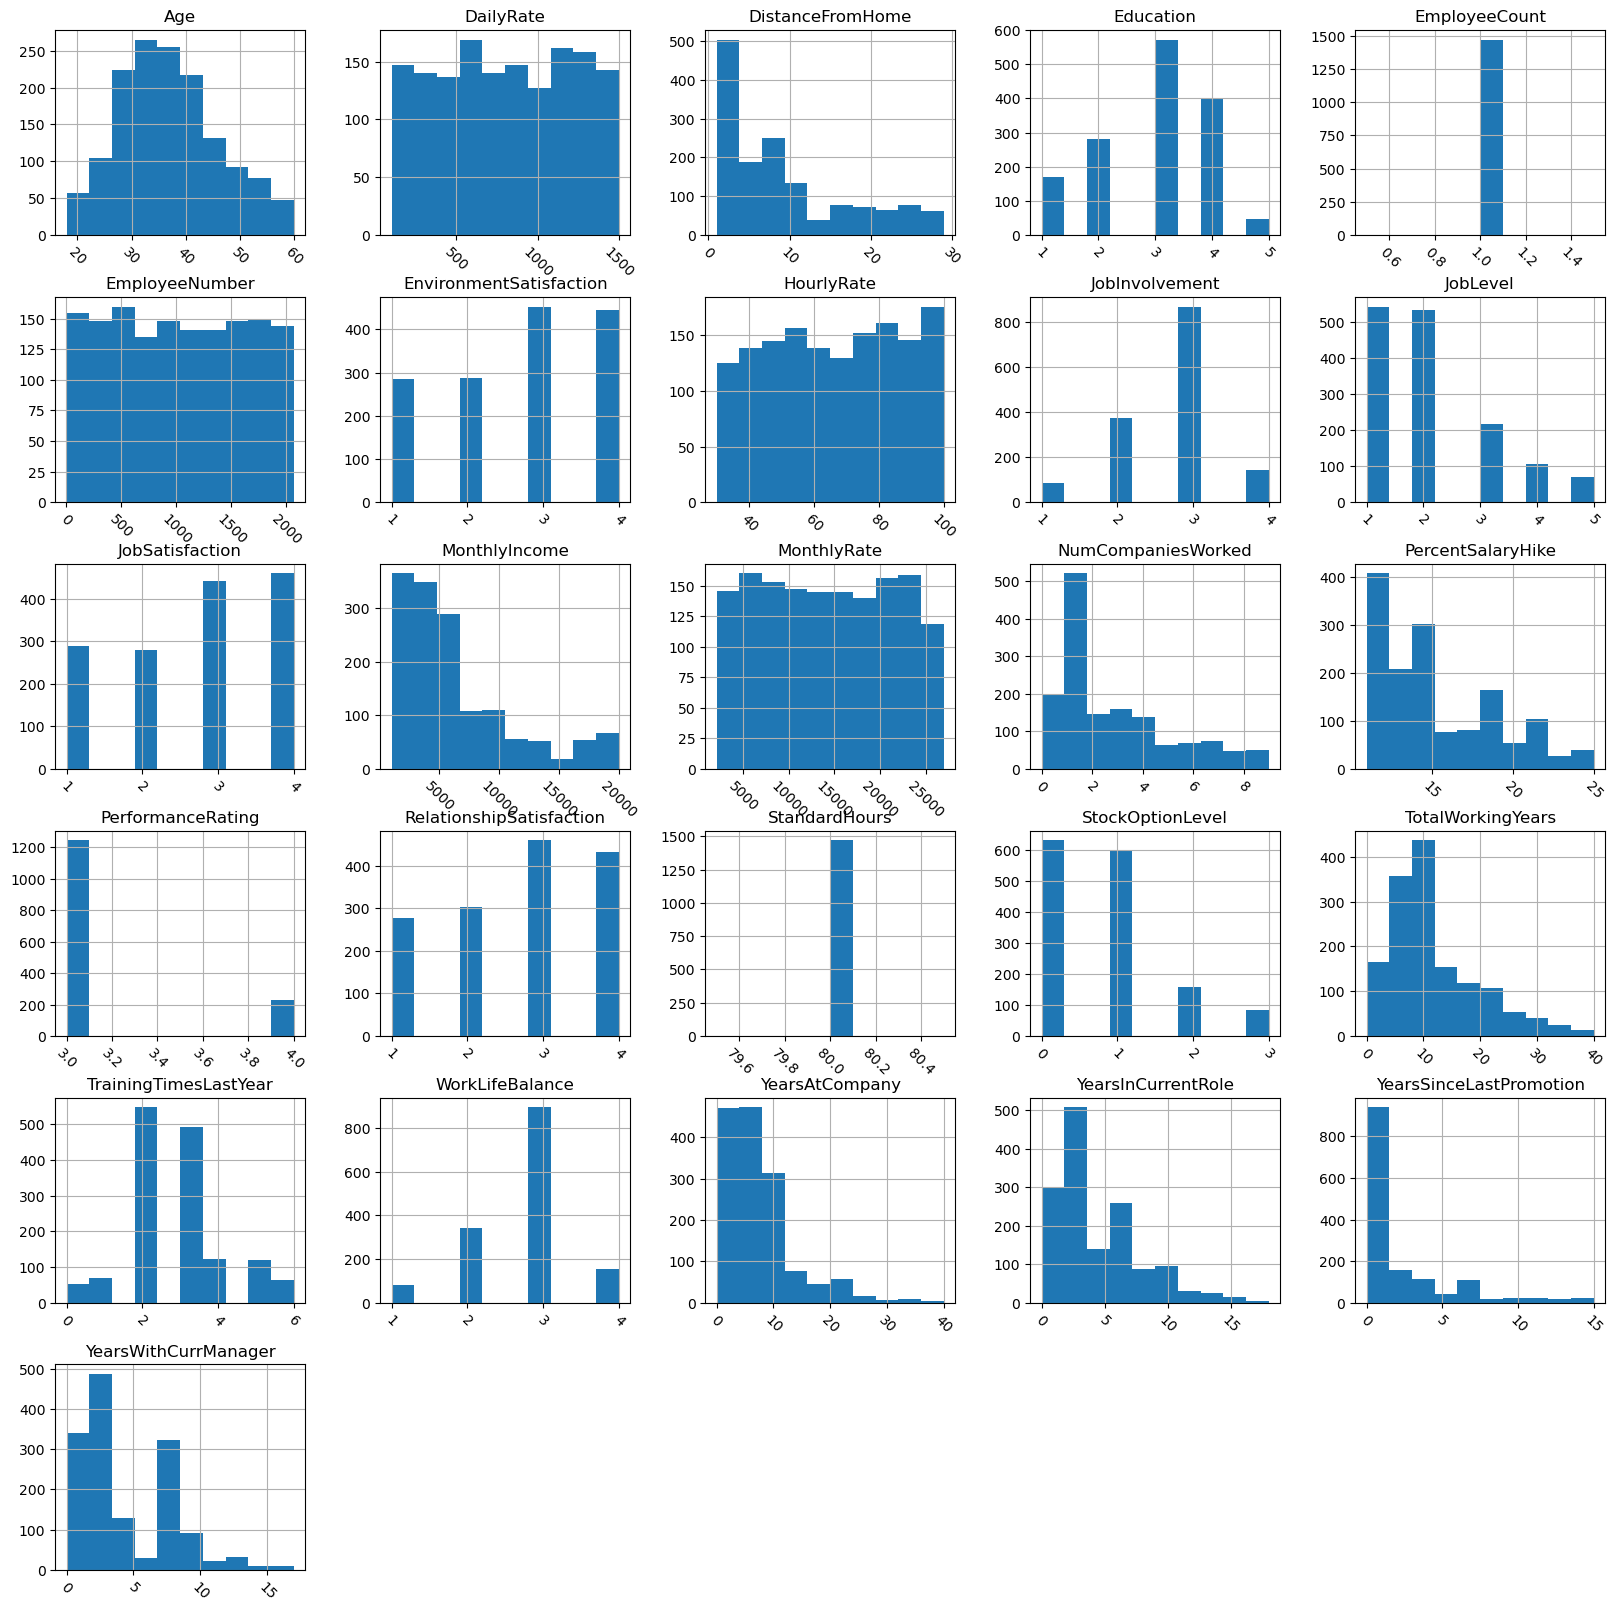

In [10]:
data.hist(figsize=(20,20), xrot=-45)
plt.show()

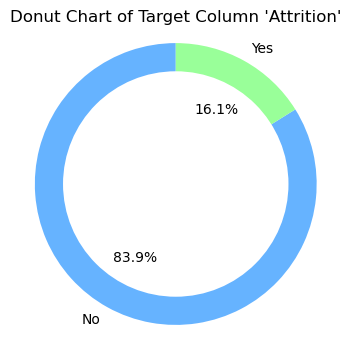

In [11]:
target_counts = data['Attrition'].value_counts()

# Create a donut chart
plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Donut Chart of Target Column 'Attrition'")
plt.show()

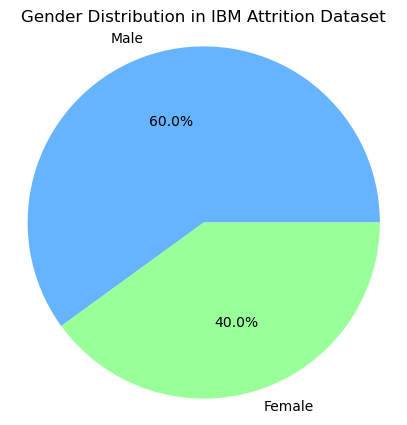

In [12]:
gender_counts = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Gender Distribution in IBM Attrition Dataset')
plt.axis('equal')
plt.show()

In [13]:
dataPlot = data.copy()
dataPlot['JobLevel'] = pd.Categorical(
    dataPlot['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
joblevel_counts = dataPlot['JobLevel'].value_counts()
joblevel_percentages = ((joblevel_counts / len(data)) * 100).round(2)

# Create a DataFrame with data for the treemap
treemap_data = pd.DataFrame({'JobLevel': joblevel_counts.index, 'Counts': joblevel_counts.values, 'Percentage': joblevel_percentages.values})

# Create the treemap using Plotly Express
fig = px.treemap(treemap_data, 
                 path=['JobLevel'], 
                 values='Counts',
                 hover_data=['Percentage'],
                 title='Job Level Distribution in IBM Attrition Dataset',
                 )

# Add text template for hover labels
fig.update_traces(textinfo='label + value +percent entry', textfont_size=14)

# Show the treemap
fig.show()

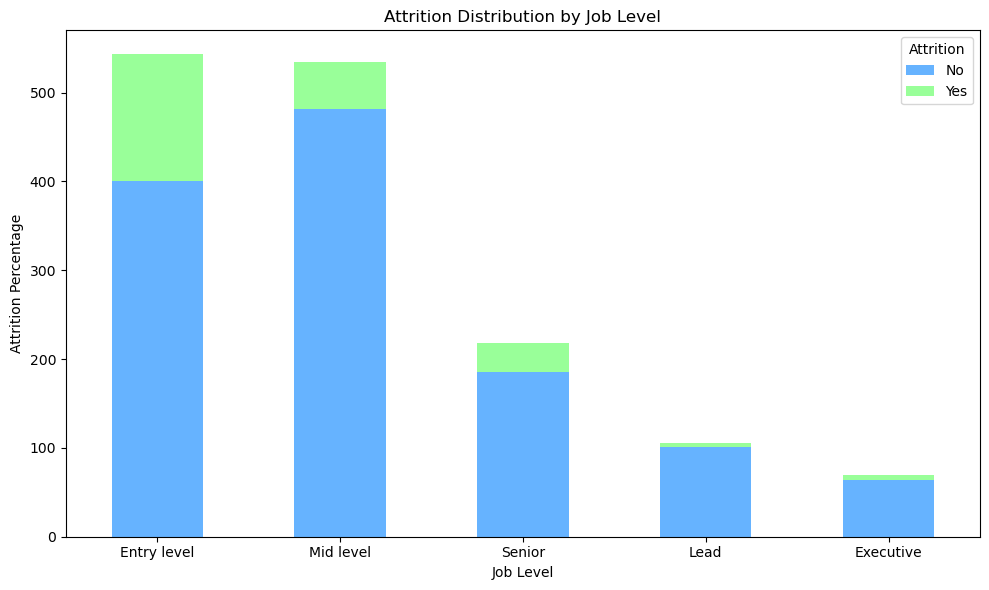

In [14]:
dataPlot = data.copy()
dataPlot['JobLevel'] = pd.Categorical(
    dataPlot['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
attrition_distribution = dataPlot.groupby('JobLevel')['Attrition'].value_counts(normalize=False).unstack()

# Plot the bar plot
ax = attrition_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#99ff99'])
plt.title('Attrition Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=0)
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()

# Display the plot
plt.show()





<Figure size 1000x600 with 0 Axes>

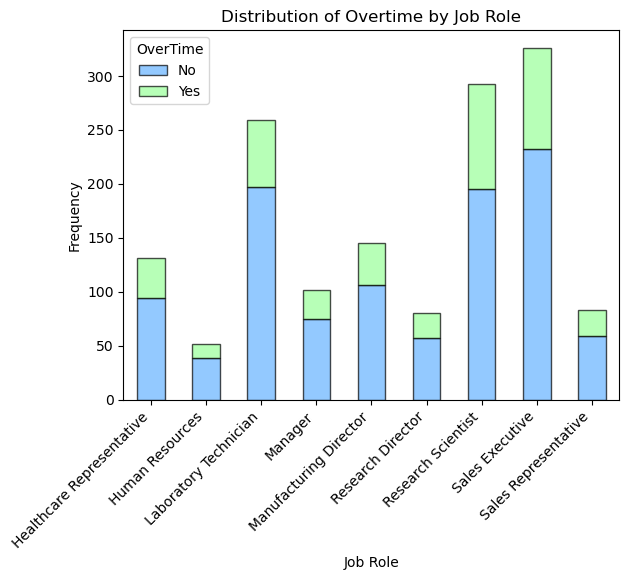

In [15]:
plt.figure(figsize=(10, 6))

# Group data by 'JobRole' and 'OverTime', and then unstack to create a histogram
hist_data = data.groupby(['JobRole', 'OverTime']).size().unstack(fill_value=0)
hist_data.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7, color=['#66b3ff', '#99ff99'])

plt.title('Distribution of Overtime by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Create a legend for 'OverTime'
plt.legend(title='OverTime')

plt.show()

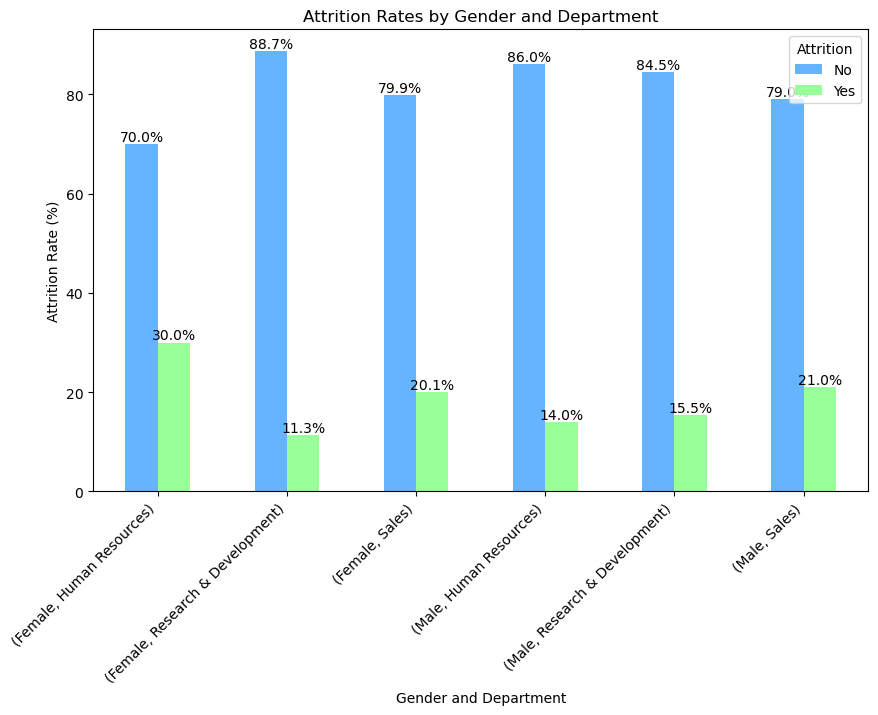

In [16]:
attrition_by_gender_dept = data.groupby(['Gender', 'Department'])['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100

# Create the bar plot
ax = attrition_by_gender_dept.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#99ff99'])
plt.title('Attrition Rates by Gender and Department')
plt.xlabel('Gender and Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge')

# Create a legend for the attrition values
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

plt.show()

In [17]:
# Group data by 'Attrition' and 'JobSatisfaction', and calculate percentages
attrition_by_jobsatisfaction = data.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
aj = attrition_by_jobsatisfaction.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
aj.JobSatisfaction = pd.Categorical(aj.JobSatisfaction).rename_categories(
    {1: 'Poor', 2: 'Neutral', 3: 'Good', 4: 'Excellent'})

# Create a bar chart using Plotly Express
fig = px.bar(aj, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})

# Update traces to use the specified color schemes
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#66b3ff', '#99ff99', '#ff9966', '#ff66b3'])

# Update y-axis and layout settings
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09, font_color='#28221D',
                  xaxis_title='Job Satisfaction')

# Show the plot
fig.show()

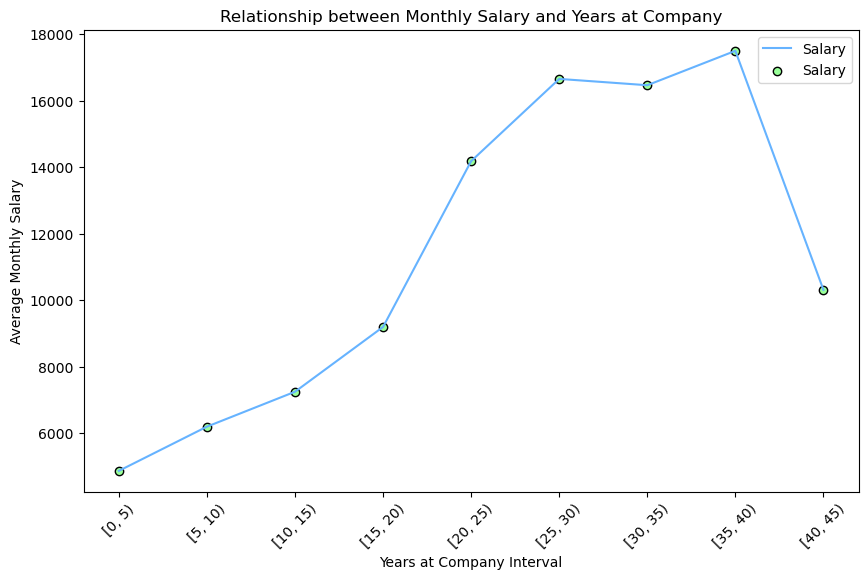

In [18]:
# Create a line chart to show the relationship between monthly salary and years at the company
plt.figure(figsize=(10, 6))

# Group data by intervals of 5 years and calculate the mean salary
bins = list(range(0, max(data['YearsAtCompany']) + 6, 5))  # Define bin edges
data['YearsInterval'] = pd.cut(data['YearsAtCompany'], bins=bins, right=False)
salary_by_years = data.groupby('YearsInterval')['MonthlyIncome'].mean()

# Plot the line chart with specified color for the line
plt.plot(salary_by_years.index.astype(str), salary_by_years.values, color='#66b3ff', label='Salary')

# Set the color for the markers
marker_color = '#99ff99'
plt.scatter(salary_by_years.index.astype(str), salary_by_years.values, color=marker_color, label='Salary', edgecolors='black')

plt.title('Relationship between Monthly Salary and Years at Company')
plt.xlabel('Years at Company Interval')
plt.ylabel('Average Monthly Salary')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

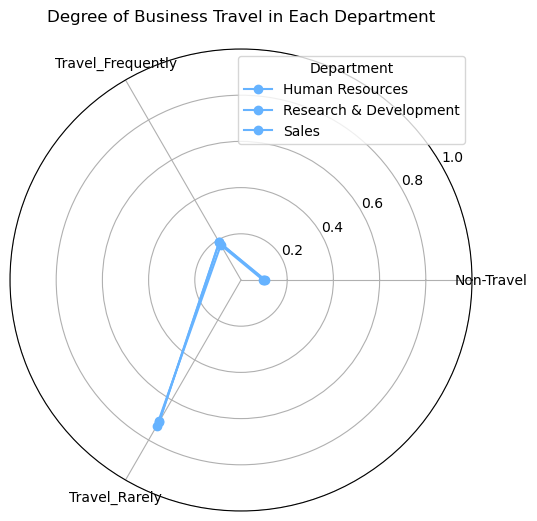

In [19]:
# Group data by 'Department' and calculate the mean values for 'BusinessTravel'
dept_business_travel = data.groupby('Department')['BusinessTravel'].value_counts(normalize=True).unstack().fillna(0)

# List of departments and business travel categories
departments = dept_business_travel.index
categories = dept_business_travel.columns

# Create a figure and axis for the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'polar': True})

# Create evenly spaced angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Plot radar chart for each department
for department in departments:
    values = dept_business_travel.loc[department].values
    ax.plot(angles, values, label=department, color='#66b3ff', marker='o')

# Set angle ticks and labels
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Set radial axis labels and limits
ax.set_rlabel_position(30)  # Position of radial labels
ax.set_ylim(0, 1)  # Limit of radial axis

# Add legend
ax.legend(title='Department')

# Add a title
plt.title('Degree of Business Travel in Each Department', pad=20)

# Display the radar chart
plt.show()


In [20]:
# Rename jobLevel categories
data['JobLevel'] = data['JobLevel'].replace({1: 'Entry Level', 2: 'Mid Level', 3: 'Senior', 4: 'Lead', 5: 'Executive'})

# Select relevant columns
scatter_data = data[['TotalWorkingYears', 'MonthlyIncome', 'JobLevel']]

fig = px.scatter(scatter_data, x='TotalWorkingYears', y='MonthlyIncome', color='JobLevel', size='MonthlyIncome',
                 hover_name='JobLevel', title='Monthly Income vs. Years Worked by Job Level',
                 color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(xaxis_title='Years Worked', yaxis_title='Monthly Income')

# Display the scatter plot
fig.show()

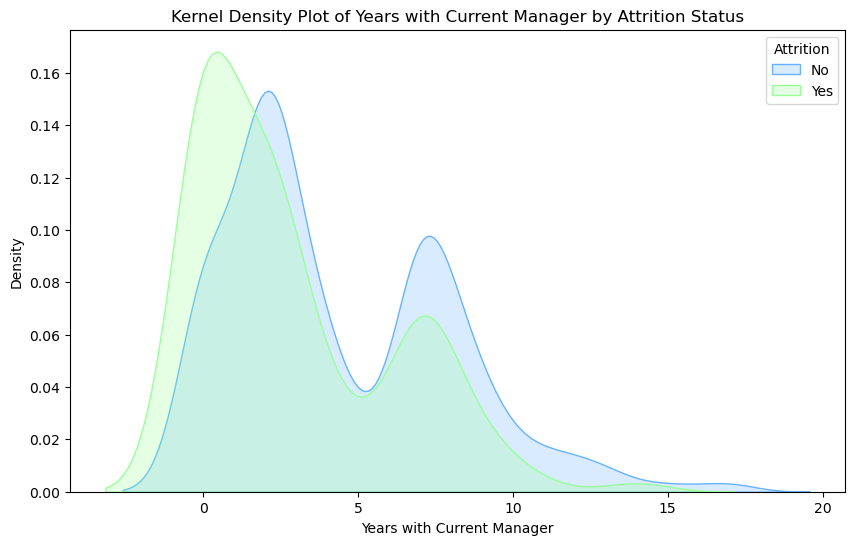

In [21]:
plt.figure(figsize=(10, 6))

# Create the kernel density plot for years with current manager
sns.kdeplot(data=data, x='YearsWithCurrManager', hue='Attrition', common_norm=False, fill=True,
            palette={'No': '#66b3ff', 'Yes': '#99ff99'})

plt.title('Kernel Density Plot of Years with Current Manager by Attrition Status')
plt.xlabel('Years with Current Manager')
plt.ylabel('Density')
plt.legend(title='Attrition',labels=['No', 'Yes'])

# Display the kernel density plot
plt.show()

<Axes: >

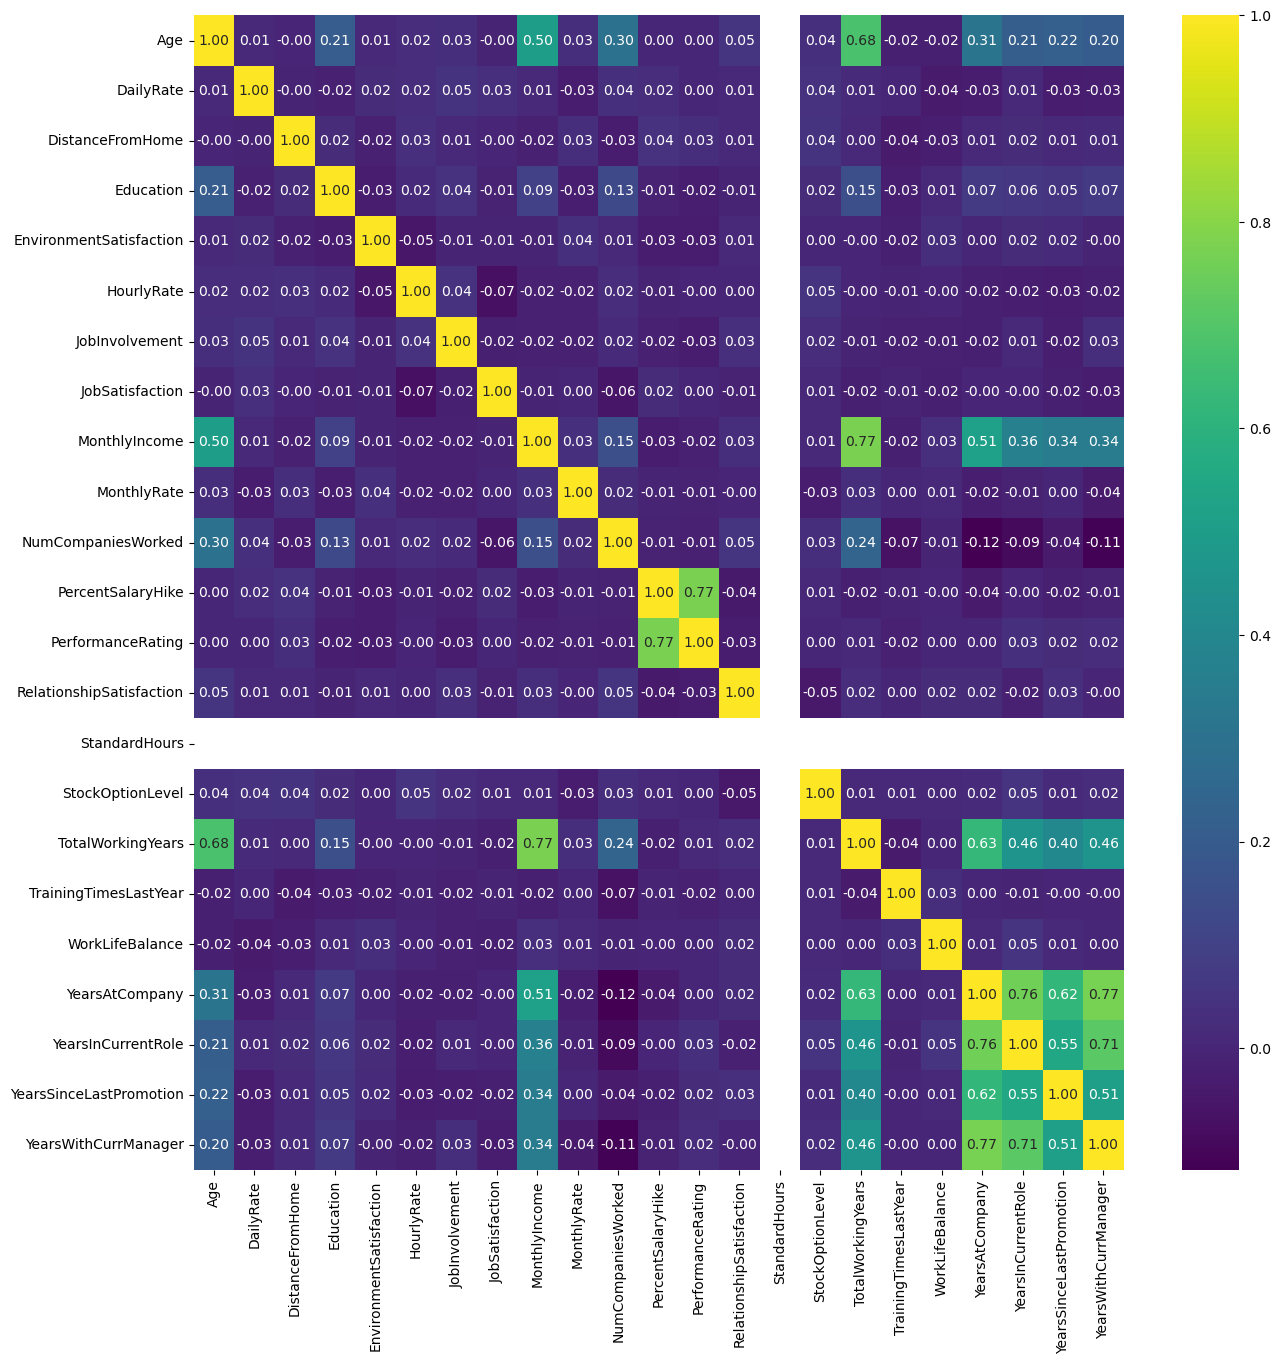

In [22]:
# Plot correlation heatmap
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

<Axes: >

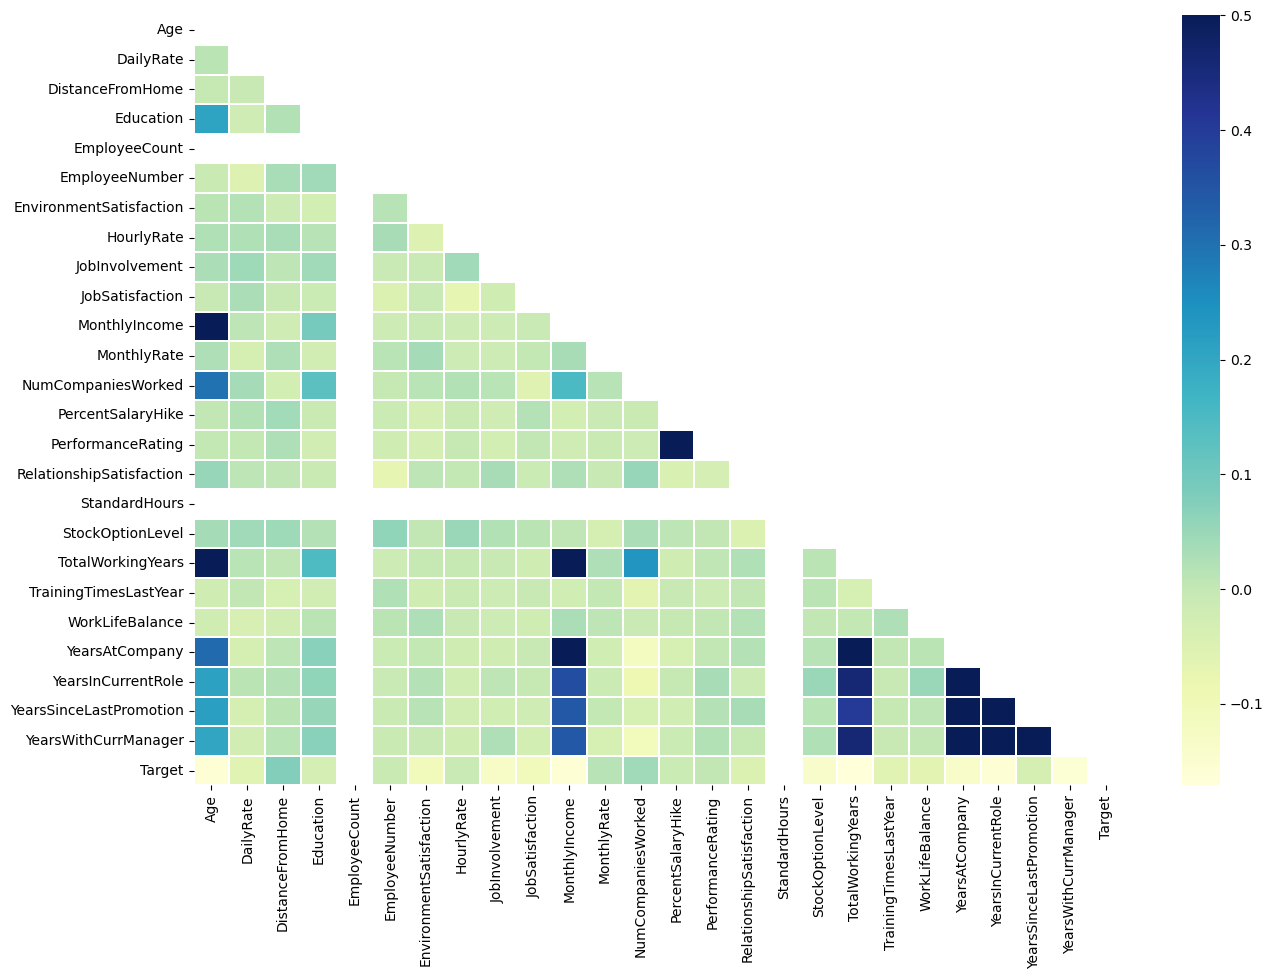

In [23]:
# Calculate correlations with target
data_copy = data.copy()
data_copy['Target'] = data_copy['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

corr = data_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

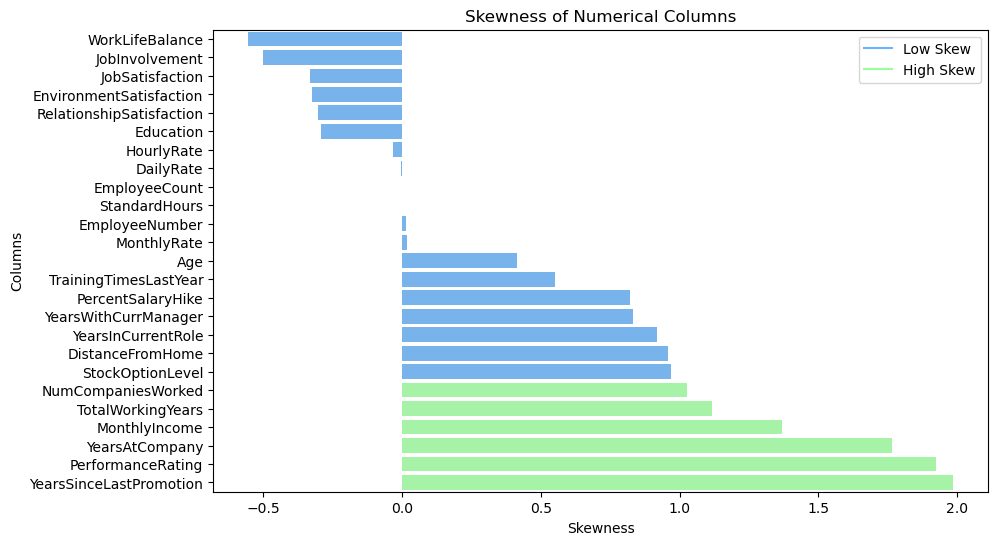

In [24]:
# Calculate skewness for numerical columns
skewness = data.select_dtypes(include=['number']).apply(lambda x: x.skew())

# Define threshold for skewness
skewness_threshold = 1  # You can adjust this threshold as needed

# Group columns into low and high skewed
low_skewed = skewness[skewness <= skewness_threshold].index
high_skewed = skewness[skewness > skewness_threshold].index

# Sort columns by skewness in ascending order
sorted_columns = skewness.sort_values()

# Create a color map for low and high skewed features
colors = ['#66b3ff' if col in low_skewed else '#99ff99' for col in sorted_columns.index]

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_columns.values, y=sorted_columns.index, palette=colors)

plt.title('Skewness of Numerical Columns')
plt.xlabel('Skewness')
plt.ylabel('Columns')
plt.legend(handles=[plt.Line2D([0], [0], color='#66b3ff', label='Low Skew'),
                    plt.Line2D([0], [0], color='#99ff99', label='High Skew')],
           loc='upper right')

# Display the bar chart
plt.show()

In [25]:
# Calculate skewness for numerical columns
skewness = data.select_dtypes(include=['number']).apply(lambda x: x.skew())

# Define threshold for skewness
skewness_threshold = 1  # You can adjust this threshold as needed

# Group columns into low and high skewed
low_skewed = skewness[skewness <= skewness_threshold].index
high_skewed = skewness[skewness > skewness_threshold].index

# Store the list of features in the 'skewed_columns' variable
skewed_columns = low_skewed.tolist() + high_skewed.tolist()

# Print the list of skewed columns
print("Skewed Columns:", skewed_columns)

Skewed Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyRate', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsWithCurrManager', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']


In [26]:
# Perform quantile scaling on skewed columns
scaler = QuantileTransformer(output_distribution='normal')
data[skewed_columns] = scaler.fit_transform(data[skewed_columns])

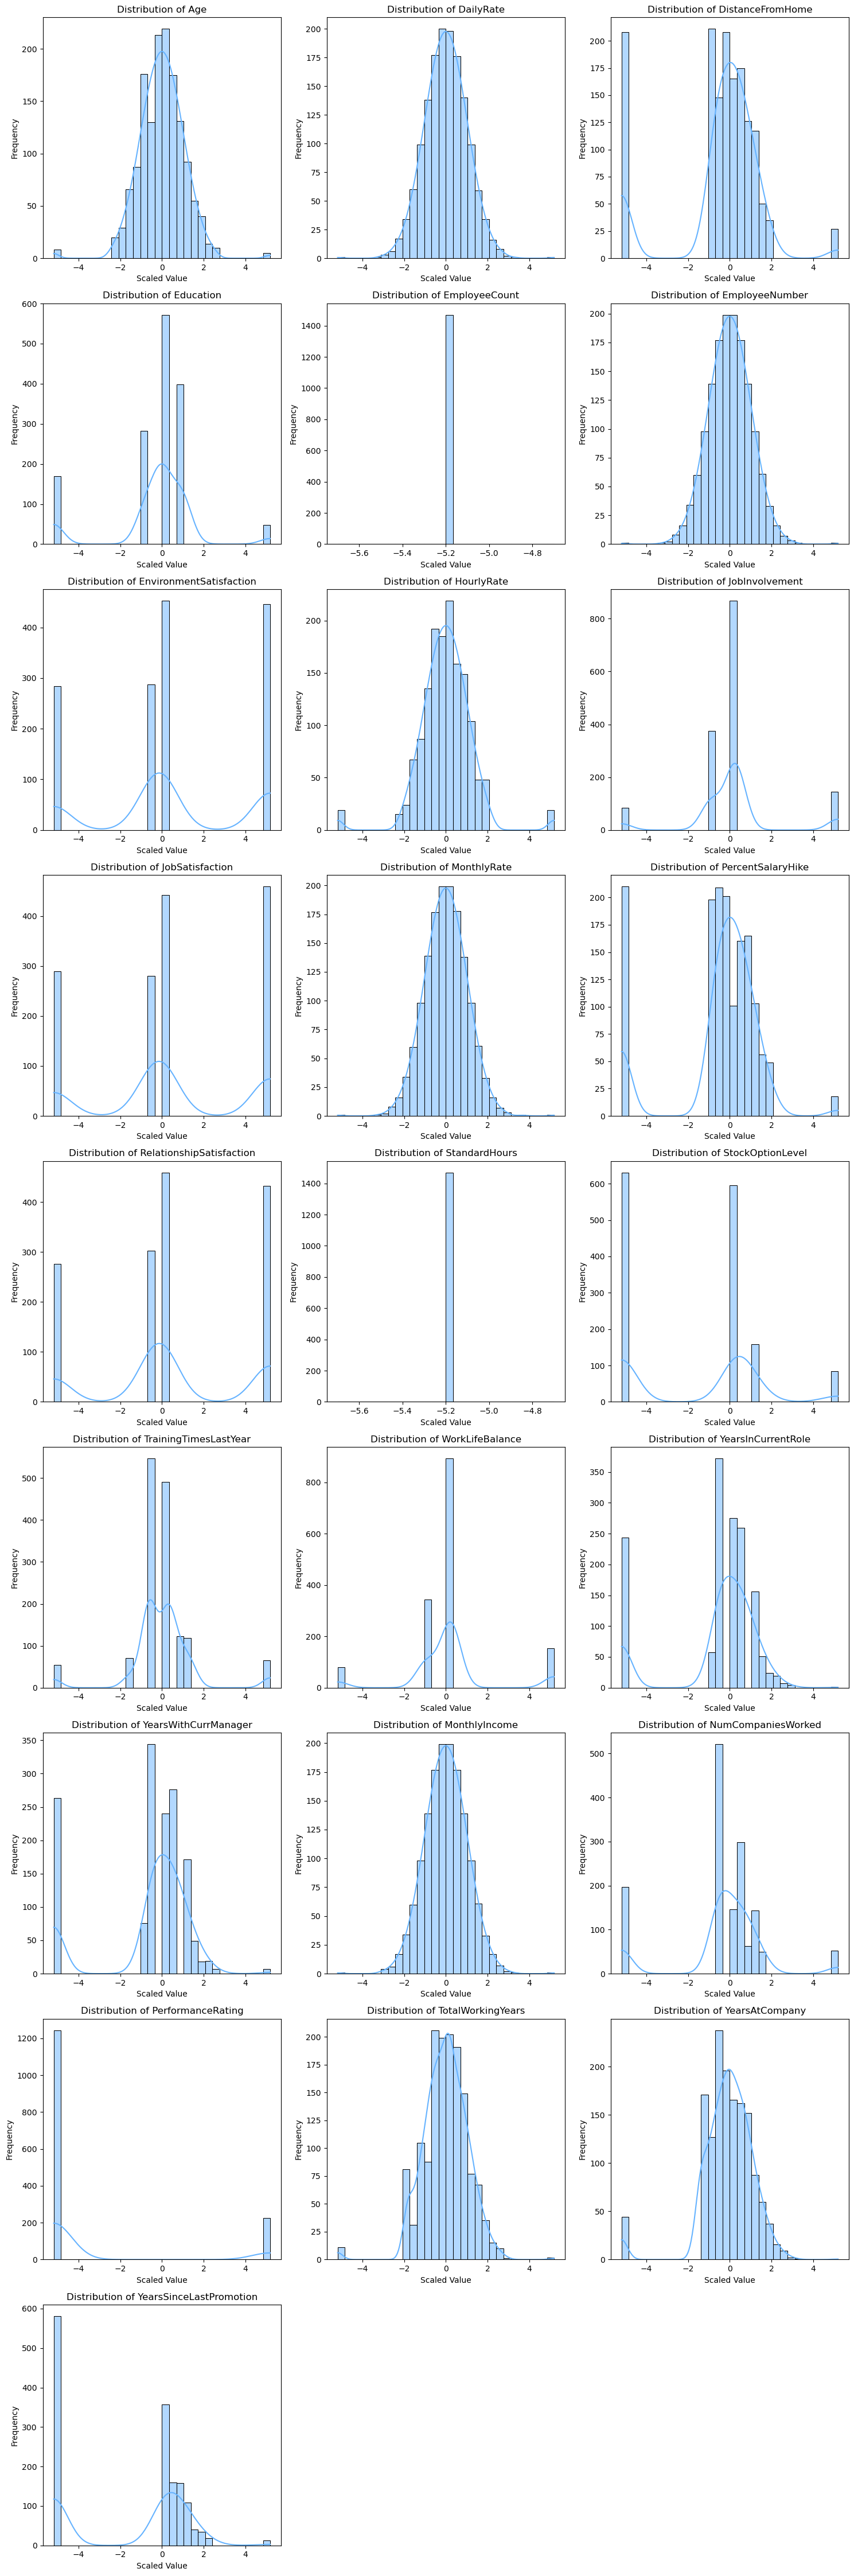

In [27]:
# Plot distribution chart of quantile-scaled data in skewed_columns
num_plots = len(skewed_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

for idx, column in enumerate(skewed_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.histplot(data[column], bins=30, kde=True, color='#66b3ff')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
data_copy = data.copy()
# List of features to remove
features_to_remove = ["StandardHours", "EmployeeCount", "PerformanceRating","Over18",'EmployeeNumber']
# Over18 has only one value for all rows
#Unable to improve distribution of PerformanceRating
# Drop the specified features from the DataFrame
data_copy = data_copy.drop(columns=features_to_remove)

In [29]:
# Label Encoding will be used for columns with 2 or less unique values
le = LabelEncoder()
count = 0
for col in data_copy[1:]:
    if data_copy[col].dtype == 'object':
        if len(list(data_copy[col].unique())) <= 2:
            le.fit(data_copy[col])
            data_copy[col] = le.transform(data_copy[col])
            count += 1
print('{} columns were label encoded.'.format(count))
# Identify categorical columns
categorical_columns = data_copy.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
data_copy = pd.get_dummies(data_copy, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
data_copy.head()

3 columns were label encoded.


Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  0.516356          1   0.542302         -5.199338  -0.802226   
1  1.147315          0  -1.165137          0.137177  -5.199338   
2  0.151121          1   1.365257         -0.795322  -0.802226   
3 -0.330873          0   1.448845         -0.486480   0.963423   
4 -1.142483          0  -0.378977         -0.795322  -5.199338   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0                -0.551076       0    1.275302        0.271787   
1                 0.106841       1   -0.167640       -0.901416   
2                 5.199338       1    1.135284       -0.901416   
3                 5.199338       0   -0.365531        0.271787   
4                -5.199338       1   -1.157061        0.271787   

   JobSatisfaction  ...  JobRole_Human Resources  \
0         5.199338  ...                        0   
1        -0.548158  ...                        0   
2         0.092972  ...                        0   
3         0.092972  ...                        0   
4        -0.548158  ...                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      0                     1  
1                             0                      1                     0  
2                             0                      0                     1  
3                             0                      1                     0  
4                             0                      1                     0  

[5 rows x 48 columns]

In [30]:
# Select only numerical columns for box plots
numerical_columns = data_copy.select_dtypes(include=['number']).columns

print(numerical_columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobLevel_Executive',
       'JobLevel_Lead', 'JobLevel_Mid Level', 'JobLevel_Senior',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturin

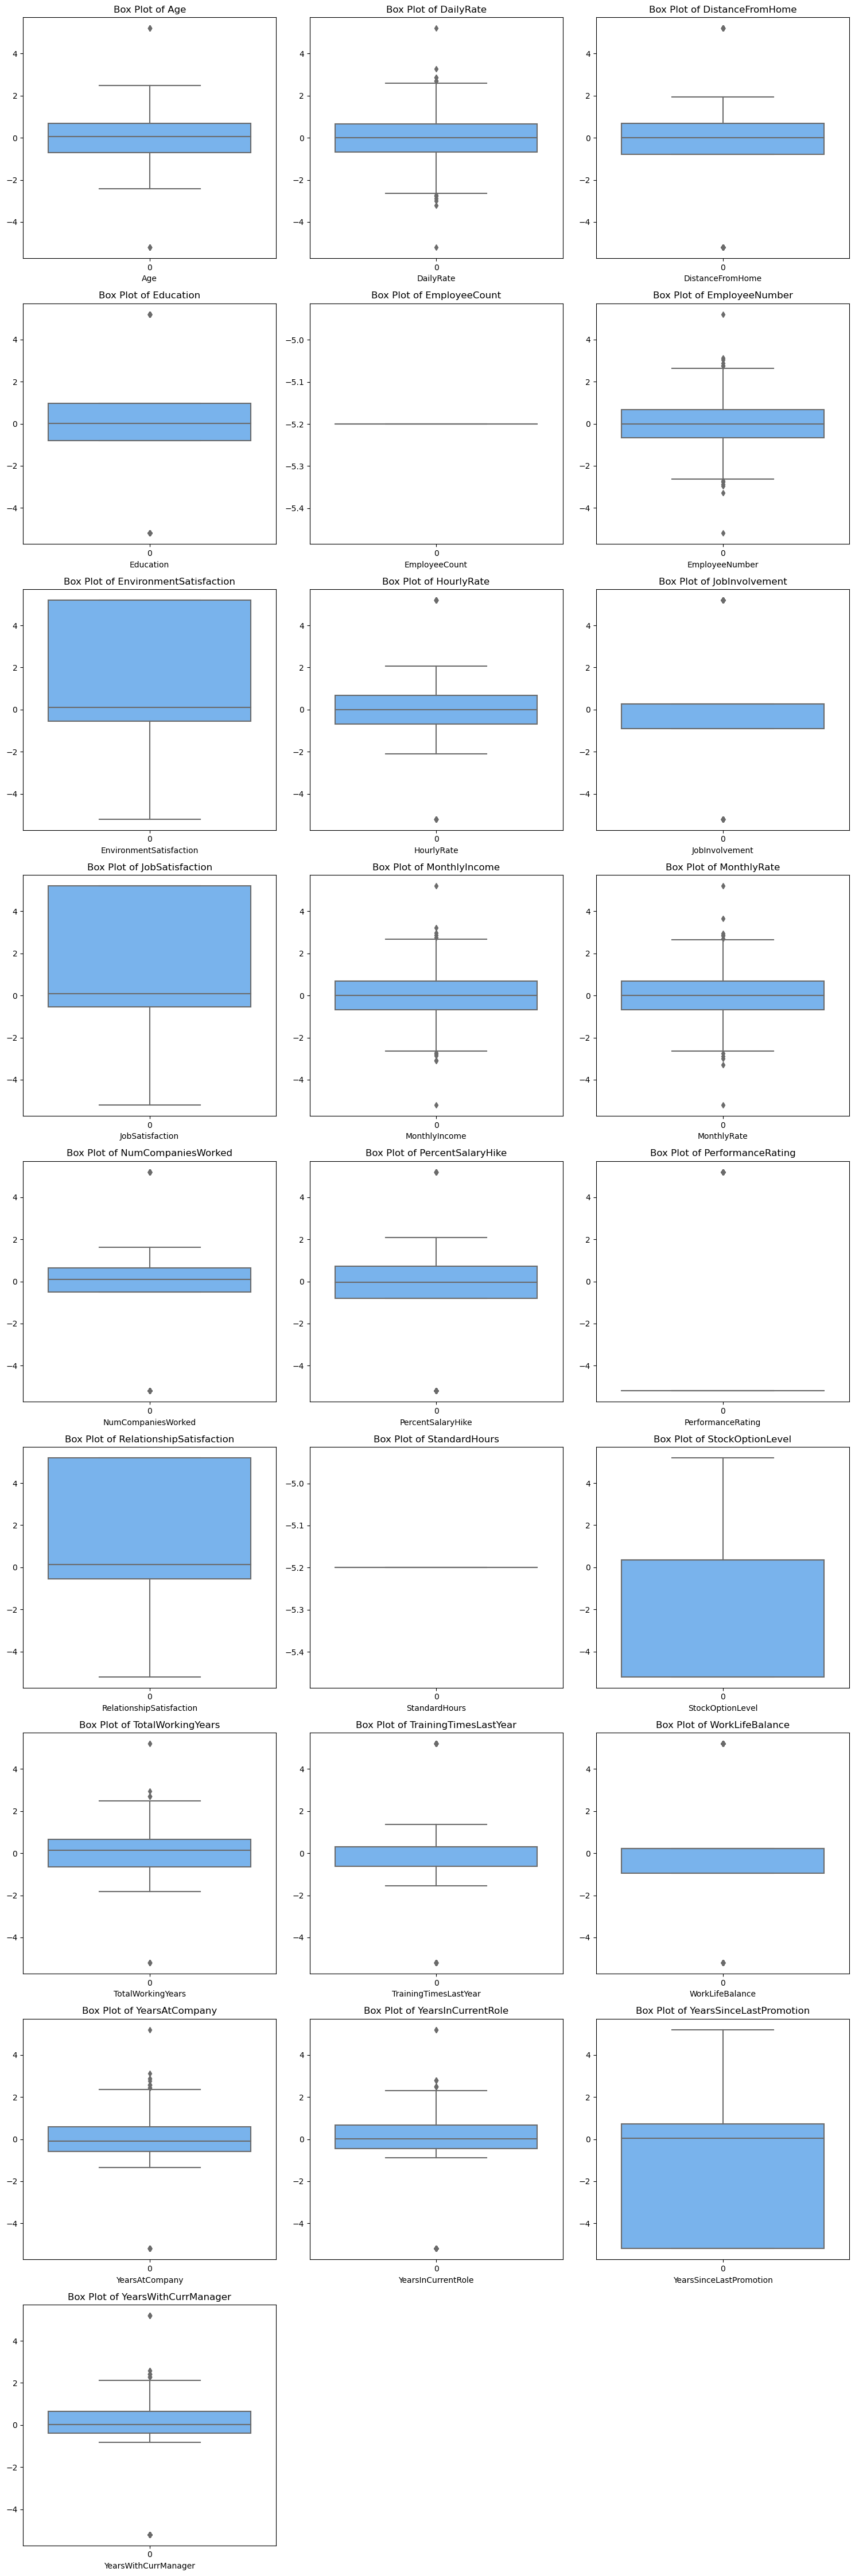

In [31]:
# Select only numerical columns for box plots
numerical_column = data.select_dtypes(include=['number']).columns
# Determine the number of rows and columns for subplots
num_plots = len(numerical_column)
num_cols = 3  # You can adjust this as needed
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

# Create box plots for each numerical feature
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

for idx, column in enumerate(numerical_column):
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.boxplot(data=data[column], color='#66b3ff')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [32]:
print(data_copy.columns.tolist())

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsInterval', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobLevel_Executive', 'JobLevel_Lead', 'JobLevel_Mid Level', 'JobLevel_Senior', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales 

In [33]:
# Calculate the correlation matrix
correlation_matrix = data_copy.corr()
threshold=0.7
cols = list(correlation_matrix.columns)
cols_at_index = list(correlation_matrix.index)
feature1, feature2, correlation = [], [], []
for i in range(len(cols)):
    for j in range(len(correlation_matrix)):
        if correlation_matrix[cols[i]][j] >= threshold and correlation_matrix[cols[i]][j] < 1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlation_matrix[cols[i]][j])

colinear_table = pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
colinear_table

feature1                 feature2  correlation
0       MonthlyIncome        TotalWorkingYears     0.718906
1      YearsAtCompany       YearsInCurrentRole     0.709068
2  YearsInCurrentRole     YearsWithCurrManager     0.713997
3    Department_Sales  JobRole_Sales Executive     0.808869

In [34]:
# Drop JobRole_Sales Executive for Department_Sales due to colinearity and EmployeeCount as it is irrelavant and categorical feature YearsInterval
features_to_drop = ['JobRole_Sales Executive','YearsInterval']

# Drop the specified features from the DataFrame
data_copy = data_copy.drop(columns=features_to_drop)


In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define the target column and its corresponding values
target_column = 'Attrition'
minority_class_value = 'Yes'

# Separate the feature columns and the target column
X = data_copy.drop(columns=[target_column])
y = data_copy[target_column]


# Sample the minority class using SMOTE
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)


# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


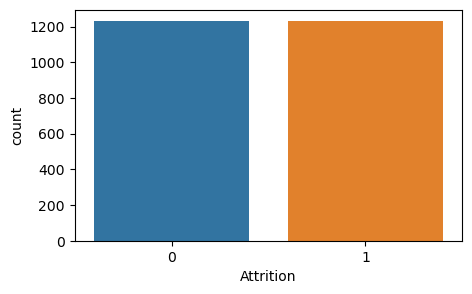

In [36]:
plt.subplots(figsize=(5,3))
sns.countplot(x=y);

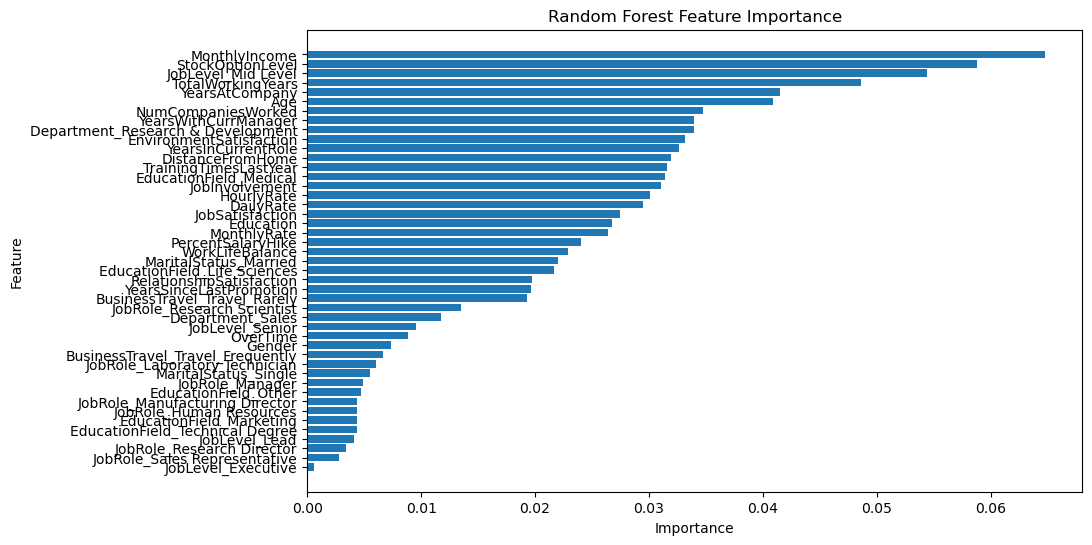

In [37]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dataframe to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

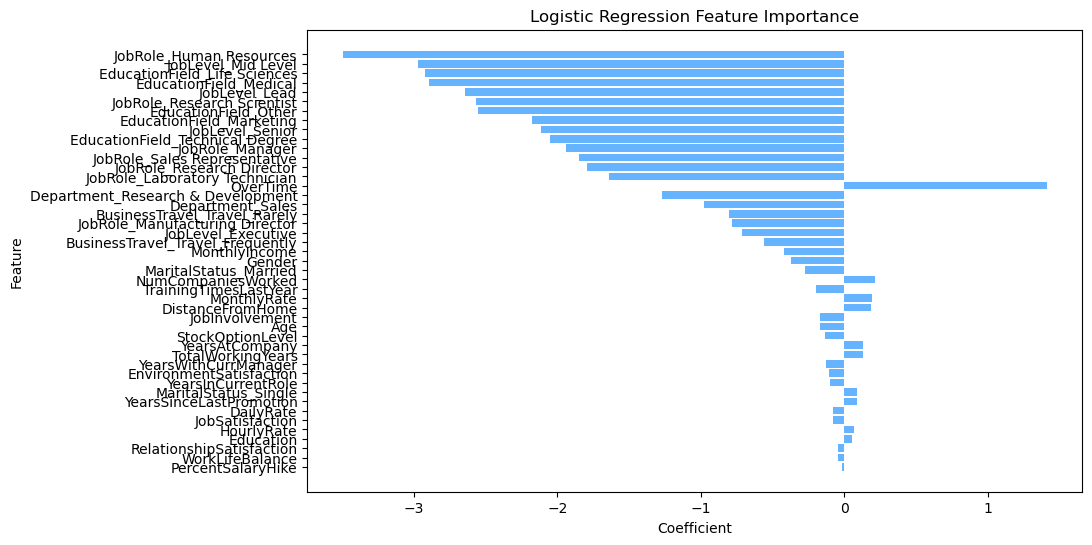

In [38]:
# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients (feature importances) from the model
coefficients = model.coef_[0]

# Create a DataFrame with feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='#66b3ff')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

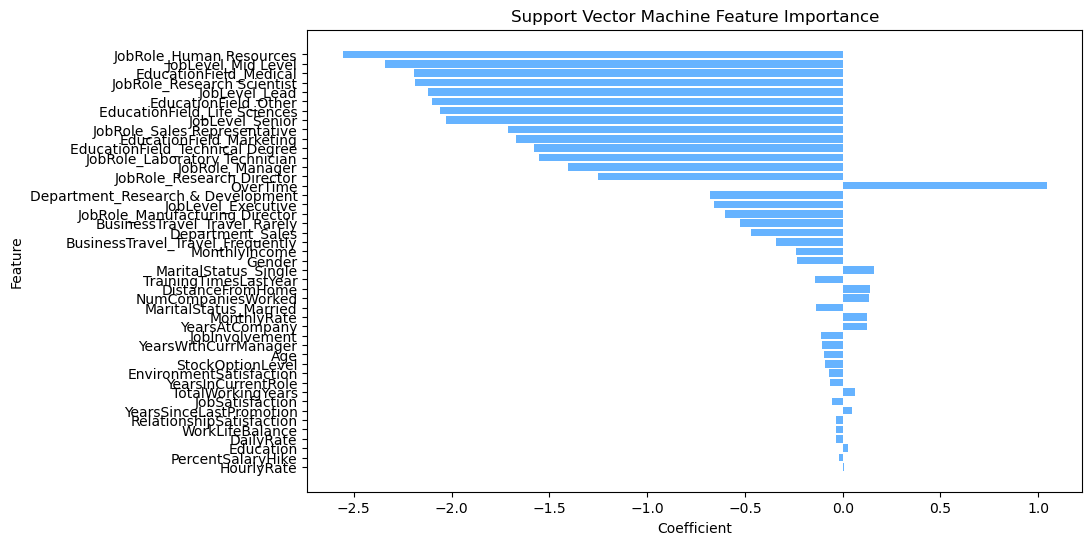

In [39]:
# Create and fit an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Get the coefficients (weights) of the support vectors
coefficients = model.coef_[0]

# Create a DataFrame with feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='#66b3ff')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Support Vector Machine Feature Importance')
plt.show()

In [40]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE model using the Random Forest classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=11, step=1)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = X_train.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Print the selected features and their rankings
for feature, ranking in zip(selected_features, feature_rankings):
    print(f"Feature: {feature}, Ranking: {ranking}")

Feature: Age, Ranking: 1
Feature: EnvironmentSatisfaction, Ranking: 8
Feature: HourlyRate, Ranking: 2
Feature: JobInvolvement, Ranking: 7
Feature: MonthlyIncome, Ranking: 1
Feature: NumCompaniesWorked, Ranking: 22
Feature: StockOptionLevel, Ranking: 1
Feature: TotalWorkingYears, Ranking: 1
Feature: TrainingTimesLastYear, Ranking: 9
Feature: YearsAtCompany, Ranking: 1
Feature: YearsWithCurrManager, Ranking: 4


In [41]:
# Drop features based on feature importance scores
features_to_drop = ['JobLevel_Executive','JobRole_Sales Representative','JobRole_Human Resources','JobRole_Research Director','BusinessTravel_Travel_Frequently','EducationField_Marketing', 'EducationField_Technical Degree',
                   'JobRole_Manufacturing Director','Gender','MaritalStatus_Single','JobLevel_Lead']

# Drop columns from X_train
X_train = X_train.drop(columns=features_to_drop)

# Drop the same columns from X_test
X_test = X_test.drop(columns=features_to_drop)

24/24 [==============================] - 0s 1ms/step


Hyperparameters  Accuracy    Recall  \
1  {'units_1': 256, 'units_2': 128, 'batch_size':...  0.921622  0.932615   
0  {'units_1': 128, 'units_2': 64, 'batch_size': ...  0.913514  0.927224   
3  {'units_1': 512, 'units_2': 256, 'batch_size':...  0.913514  0.927224   
2  {'units_1': 64, 'units_2': 32, 'batch_size': 1...  0.910811  0.911051   
4  {'units_1': 32, 'units_2': 16, 'batch_size': 8...  0.894595  0.894879   

   Precision  F1 Score  Log Loss  
1   0.912929  0.922667  0.360616  
0   0.902887  0.914894  0.365929  
3   0.902887  0.914894  0.365024  
2   0.911051  0.911051  0.382236  
4   0.894879  0.894879  0.554477

24/24 [==============================] - 0s 2ms/step


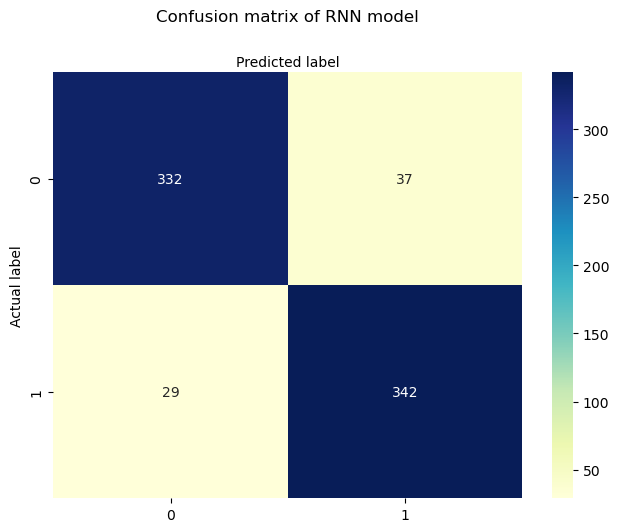

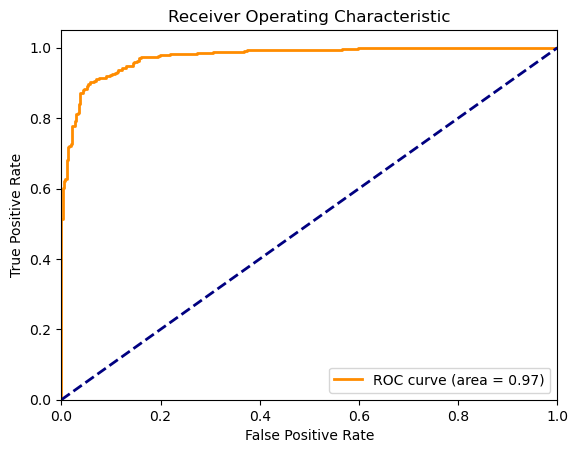

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate


# Define a list of hyperparameter combinations to try
hyperparameter_combinations = [
    {'units_1': 128, 'units_2': 64, 'batch_size': 32, 'epochs': 50},
    {'units_1': 256, 'units_2': 128, 'batch_size': 64, 'epochs': 60},
    {'units_1': 64, 'units_2': 32, 'batch_size': 16, 'epochs': 40},
    {'units_1': 512, 'units_2': 256, 'batch_size': 128, 'epochs': 70},
    {'units_1': 32, 'units_2': 16, 'batch_size': 8, 'epochs': 55}
    # Add more hyperparameter combinations as needed
]

# Initialize lists to store evaluation metrics and ROC data
results = []

# Loop over each hyperparameter combination
for params in hyperparameter_combinations:
    # Build the RNN model with the specified hyperparameters
    model = Sequential()
    model.add(Dense(units=params['units_1'], activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=params['units_2'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=params['batch_size'], epochs=params['epochs'], verbose=0)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.round(y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    roc_auc = roc_auc_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    
    # Store results in a dictionary
    results.append({
        'Hyperparameters': params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Log Loss': logloss
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Sort results by descending F1 Score
results_rnn_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best scores table
best_scores_table = results_rnn_df[['Hyperparameters', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']]
display(pd.DataFrame(best_scores_table ).sort_values('Accuracy', ascending=False))

# Find the index of the best performing model
best_index = results_rnn_df.index[0]

# Best Model Confusion Matrix
best_model = Sequential()
best_model.add(Dense(units=hyperparameter_combinations[best_index]['units_1'], activation='relu', input_dim=X_train.shape[1]))
best_model.add(Dense(units=hyperparameter_combinations[best_index]['units_2'], activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, batch_size=hyperparameter_combinations[best_index]['batch_size'],
               epochs=hyperparameter_combinations[best_index]['epochs'], verbose=0)

y_pred_best = best_model.predict(X_test)
y_pred_classes_best = np.round(y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_classes_best)

## Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_best), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of RNN model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# AUC Curve for the best model
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_best)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 0s 2ms/step
+--------------------------------------------------------------------------------------------------------+------------+----------+-------------+------------+------------+
| Hyperparameters                                                                                        |   Accuracy |   Recall |   Precision |   F1 Score |   Log Loss |
+========================================================================================================+============+==========+=============+============+============+
| {'filters_1': 64, 'kernel_size_1': 3, 'pool_size_1': 2, 'dropout_1': 0.2, 'units': 128, 'epochs': 60}  |   0.902703 | 0.916442 |    0.892388 |   0.904255 |   0.42935  |
+--------------------------------------------------------------------------------------------------------+------------+----------+-------------+------------+------------+
| {'filters_1': 64, 'kernel_size_1': 4, 'pool_size_1': 2, 'dropout_1': 0.2, 'units': 64, 'ep

Hyperparameters  Accuracy    Recall  \
1  {'filters_1': 64, 'kernel_size_1': 3, 'pool_si...  0.902703  0.916442   
3  {'filters_1': 64, 'kernel_size_1': 4, 'pool_si...  0.895946  0.919137   
2  {'filters_1': 128, 'kernel_size_1': 3, 'pool_s...  0.891892  0.902965   
4  {'filters_1': 128, 'kernel_size_1': 4, 'pool_s...  0.881081  0.927224   
0  {'filters_1': 32, 'kernel_size_1': 3, 'pool_si...  0.878378  0.935310   

   Precision  F1 Score  Log Loss  
1   0.892388  0.904255  0.429350  
3   0.878866  0.898551  0.429608  
2   0.883905  0.893333  0.494789  
4   0.849383  0.886598  0.443928  
0   0.840194  0.885204  0.345599

24/24 [==============================] - 0s 2ms/step


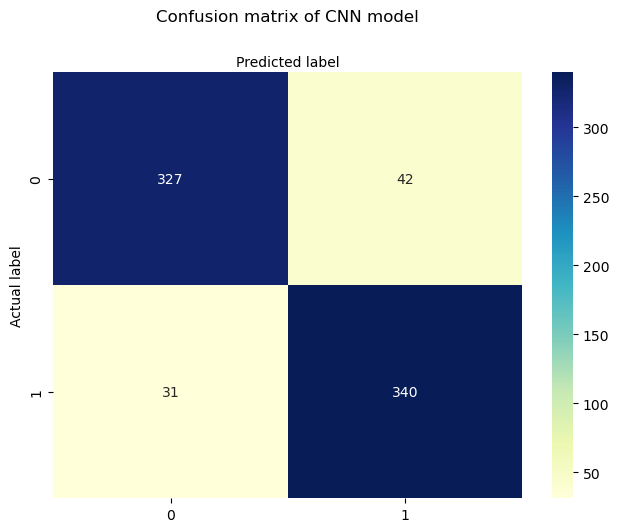

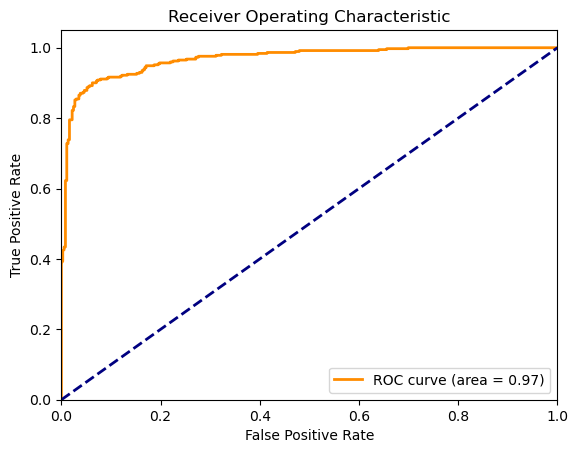

In [43]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout


# Define a list of hyperparameter combinations to try
hyperparameter_combinations = [
    {'filters_1': 32, 'kernel_size_1': 3, 'pool_size_1': 2, 'dropout_1': 0.2, 'units': 64, 'epochs': 50},
    {'filters_1': 64, 'kernel_size_1': 3, 'pool_size_1': 2, 'dropout_1': 0.2, 'units': 128, 'epochs': 60},
    {'filters_1': 128, 'kernel_size_1': 3, 'pool_size_1': 2, 'dropout_1': 0.3, 'units': 256, 'epochs': 70},
    {'filters_1': 64, 'kernel_size_1': 4, 'pool_size_1': 2, 'dropout_1': 0.2, 'units': 64, 'epochs': 55},
    {'filters_1': 128, 'kernel_size_1': 4, 'pool_size_1': 3, 'dropout_1': 0.3, 'units': 128, 'epochs': 65},
    # Add more hyperparameter combinations as needed
]

# Initialize lists to store evaluation metrics and ROC data
results = []

# Loop over each hyperparameter combination
for params in hyperparameter_combinations:
    # Build the CNN model with the specified hyperparameters
    model = Sequential()
    model.add(Conv1D(filters=params['filters_1'], kernel_size=params['kernel_size_1'], activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=params['pool_size_1']))
    model.add(Dropout(params['dropout_1']))
    model.add(Flatten())
    model.add(Dense(units=params['units'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Reshape the input data for the CNN model
    X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Train the model
    model.fit(X_train_cnn, y_train, epochs=params['epochs'], verbose=0)
    
    # Predict on the test set
    y_pred = model.predict(X_test_cnn)
    y_pred_classes = np.round(y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    roc_auc = roc_auc_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    
    # Store results in a dictionary
    results.append({
        'Hyperparameters': params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Log Loss': logloss
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Sort results by descending Accuracy
results_cnn_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best scores table
best_scores_table = results_cnn_df[['Hyperparameters', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']]
print(tabulate(best_scores_table, headers='keys', tablefmt='grid', showindex=False))
display(pd.DataFrame(best_scores_table ).sort_values('Accuracy', ascending=False))

# Find the index of the best performing model
best_index = results_cnn_df.index[0]

# Best Model Confusion Matrix
best_model = Sequential()
best_model.add(Conv1D(filters=hyperparameter_combinations[best_index]['filters_1'], kernel_size=hyperparameter_combinations[best_index]['kernel_size_1'], activation='relu', input_shape=(X_train.shape[1], 1)))
best_model.add(MaxPooling1D(pool_size=hyperparameter_combinations[best_index]['pool_size_1']))
best_model.add(Dropout(hyperparameter_combinations[best_index]['dropout_1']))
best_model.add(Flatten())
best_model.add(Dense(units=hyperparameter_combinations[best_index]['units'], activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for the CNN model
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

best_model.fit(X_train_cnn, y_train, epochs=hyperparameter_combinations[best_index]['epochs'], verbose=0)

y_pred_best = best_model.predict(X_test_cnn)
y_pred_classes_best = np.round(y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_classes_best)

## Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_best), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of CNN model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# AUC Curve for the best model
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_best)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

24/24 [==============================] - 1s 9ms/step


Hyperparameters  Accuracy    Recall  \
3  {'units_1': 256, 'dropout_1': 0.4, 'units_2': ...  0.877027  0.886792   
1  {'units_1': 128, 'dropout_1': 0.3, 'units_2': ...  0.872973  0.905660   
0  {'units_1': 64, 'dropout_1': 0.2, 'units_2': 3...  0.871622  0.854447   
4  {'units_1': 64, 'dropout_1': 0.2, 'units_2': 3...  0.860811  0.851752   
2  {'units_1': 32, 'dropout_1': 0.2, 'units_2': 1...  0.845946  0.838275   

   Precision  F1 Score  Log Loss  
3   0.870370  0.878505  0.588588  
1   0.850633  0.877285  0.428608  
0   0.885475  0.869684  0.351654  
4   0.868132  0.859864  0.366611  
2   0.852055  0.845109  0.394185

24/24 [==============================] - 4s 104ms/step


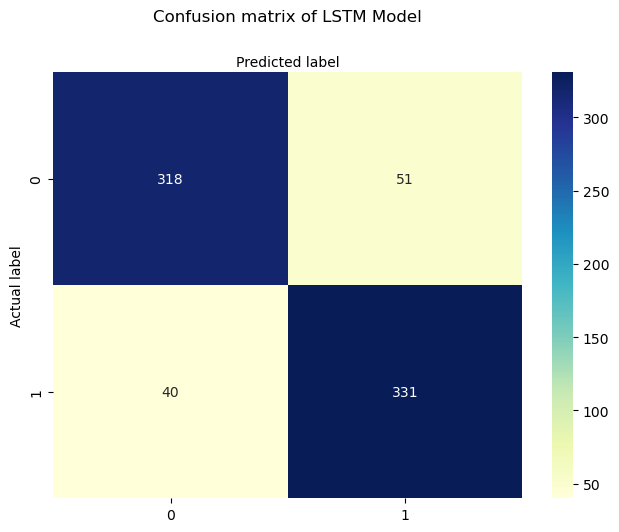

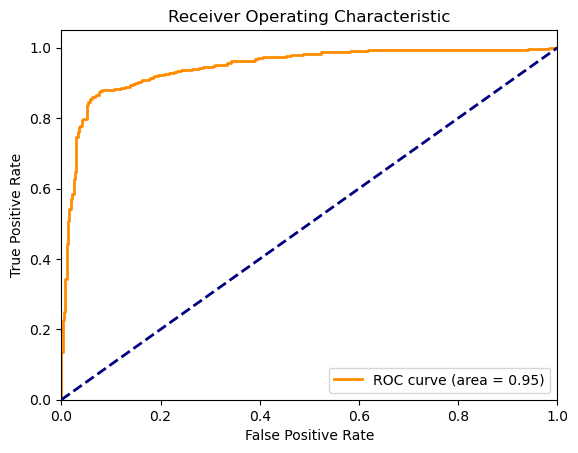

In [44]:
from keras.layers import LSTM, Dense, Dropout


# Define a list of hyperparameter combinations to try
hyperparameter_combinations = [
    {'units_1': 64, 'dropout_1': 0.2, 'units_2': 32, 'dropout_2': 0.2, 'epochs': 50},
    {'units_1': 128, 'dropout_1': 0.3, 'units_2': 64, 'dropout_2': 0.3, 'epochs': 60},
    {'units_1': 32, 'dropout_1': 0.2, 'units_2': 16, 'dropout_2': 0.2, 'epochs': 45},
    {'units_1': 256, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.4, 'epochs': 70},
    {'units_1': 64, 'dropout_1': 0.2, 'units_2': 32, 'dropout_2': 0.1, 'epochs': 55},
    # Add more hyperparameter combinations as needed
]

# Initialize lists to store evaluation metrics and ROC data
results = []

# Loop over each hyperparameter combination
for params in hyperparameter_combinations:
    # Build the LSTM model with the specified hyperparameters
    model = Sequential()
    model.add(LSTM(units=params['units_1'], input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(params['dropout_1']))
    model.add(LSTM(units=params['units_2']))
    model.add(Dropout(params['dropout_2']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Reshape the input data for the LSTM model
    X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Train the model
    model.fit(X_train_lstm, y_train, epochs=params['epochs'], verbose=0)
    
    # Predict on the test set
    y_pred = model.predict(X_test_lstm)
    y_pred_classes = np.round(y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    roc_auc = roc_auc_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    
    # Store results in a dictionary
    results.append({
        'Hyperparameters': params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Log Loss': logloss
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Sort results by Accuracy
results_lstm_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best scores table
best_scores_table = results_lstm_df[['Hyperparameters', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']]
display(pd.DataFrame(best_scores_table ).sort_values('Accuracy', ascending=False))
 

# Find the index of the best performing model
best_index = results_lstm_df.index[0]

# Best Model Confusion Matrix
best_model = Sequential()
best_model.add(LSTM(units=hyperparameter_combinations[best_index]['units_1'], input_shape=(X_train.shape[1], 1), return_sequences=True))
best_model.add(Dropout(hyperparameter_combinations[best_index]['dropout_1']))
best_model.add(LSTM(units=hyperparameter_combinations[best_index]['units_2']))
best_model.add(Dropout(hyperparameter_combinations[best_index]['dropout_2']))
best_model.add(Dense(1, activation='sigmoid'))
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for the LSTM model
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

best_model.fit(X_train_lstm, y_train, epochs=hyperparameter_combinations[best_index]['epochs'], verbose=0)

y_pred_best = best_model.predict(X_test_lstm)
y_pred_classes_best = np.round(y_pred_best)


conf_matrix_best = confusion_matrix(y_test, y_pred_classes_best)

## Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_best), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of LSTM Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# AUC Curve for the best model
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_best)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Extract the first row from each DataFrame
first_row_lstm = results_lstm_df.iloc[0]
first_row_cnn = results_cnn_df.iloc[0]
first_row_rnn = results_rnn_df.iloc[0]

# Add a 'DL Model' column with corresponding names to each first-row DataFrame
first_row_lstm['DL Model'] = 'LSTM'
first_row_cnn['DL Model'] = 'CNN'
first_row_rnn['DL Model'] = 'RNN'

# Combine the first rows into a single DataFrame
all_best_scores = pd.DataFrame([first_row_lstm, first_row_cnn, first_row_rnn])

# Sort the combined DataFrame by 'Accuracy' in descending order
best_performances_sorted = all_best_scores.sort_values(by='Accuracy', ascending=False)

# Display the sorted best performances
columns_to_display = ['DL Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss']
all_best_scores = best_performances_sorted[columns_to_display]
# Display the results table
display(pd.DataFrame(all_best_scores).sort_values('Accuracy', ascending=False))

DL Model  Accuracy  Precision    Recall  F1 Score  Log Loss
1      RNN  0.921622   0.912929  0.932615  0.922667  0.360616
1      CNN  0.902703   0.892388  0.916442  0.904255  0.429350
3     LSTM  0.877027   0.870370  0.886792  0.878505  0.588588

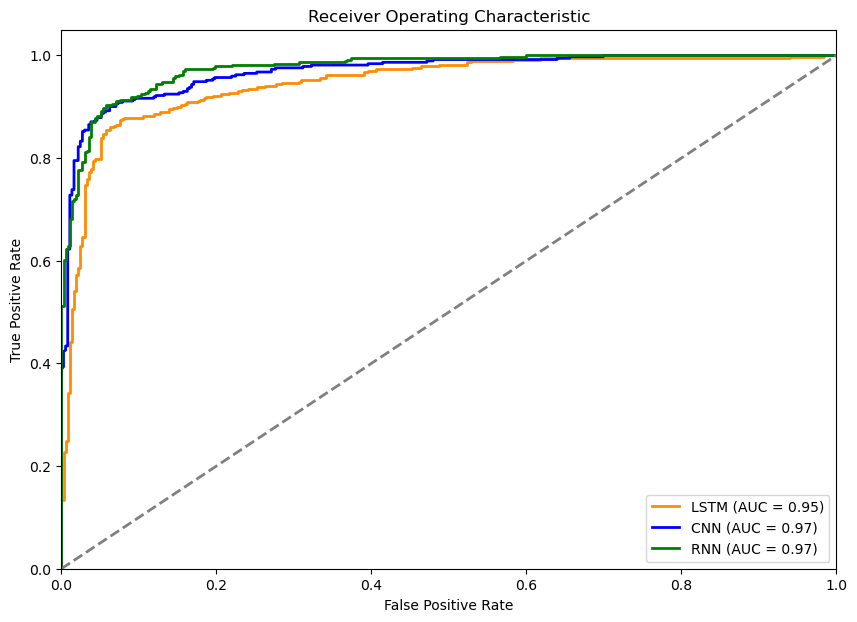

In [46]:
# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='blue', lw=2, label=f'CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_rnn, tpr_rnn, color='green', lw=2, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()